## A conceptual view the min-cut algortihm - Value of the cut in terms of delays?

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from random import *

G = nx.DiGraph()

# position of the nodes 
v1 = (1,2)
v2 = (3,3)
v3 = (2,1)
v4 = (4,1)
v5 = (5,3)

# dict of node names 
node_names = {v1: 'v1', v2: 'v2', v3: 'v3', v4: 'v4', v5: 'v5'}

# create two routes back and forth with a random weight assigned between 1-10
route1 = [(v1, v2, randint(1,10)), (v2, v3, randint(1,10)), (v3, v1, randint(1,10)), (v2, v1, randint(1,10)), (v3, v2, randint(1,10)), (v1, v3, randint(1,10))]
route2 = [(v4, v3, randint(1,10)), (v3, v5, randint(1,10)), (v5, v4, randint(1,10)), (v3, v4, randint(1,10)), (v5, v3, randint(1,10)), (v4, v5, randint(1,10))]


G.add_weighted_edges_from(route1) # line 1
G.add_weighted_edges_from(route2) # line 2

pos = nx.spring_layout(G)  # positions for all nodes

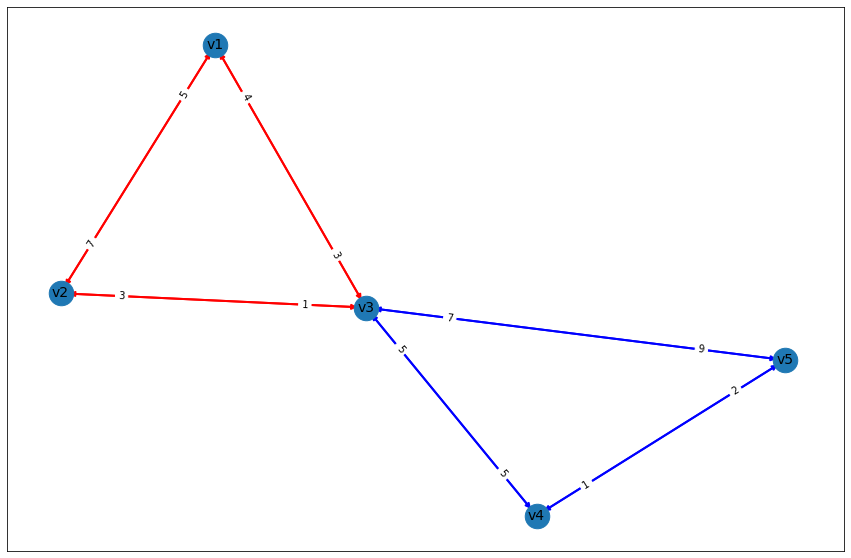

In [10]:
# Draw the graph 

# nodes
nx.draw_networkx_nodes(G, pos, node_size=600)

# edges based on routes
nx.draw_networkx_edges(G, pos, edgelist=route1,
                       width=2, edge_color='r')
nx.draw_networkx_edges(G, pos, edgelist=route2,
                       width=2, edge_color='b')

# node labels
nx.draw_networkx_labels(G, pos, font_size=14, labels=node_names )

# adding edge labels as weights
nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'weight'), label_pos=0.8)

#show bigger plot
plt.show()
plt.rcParams["figure.figsize"] = (15,10)

The figure above represent a graph G, with nodes = {v1, v2, v3, v4, v5} and directed edges connecting the nodes. The edges are directed in both directions, where a weight (random number between 1 and 10) is defined for each direction. 

In [11]:
#applying the min-cut algorithm to the graph G with defined source (v5) and sink (v1)
nx.minimum_cut(G, v5, v1, capacity = 'weight')

(4, ({(2, 1), (4, 1), (5, 3)}, {(1, 2), (3, 3)}))

The minimum-cut algorithm has been identified as useful to identify vulnerability in a public transport system in the case of an terorist attack or other disturbances. Above is the result of applying the min-cut to G with a given source and sink node. 

Paths from v5 to v1: 

1. {v5, v3, v1}
2. {v5, v3, v2, v1}
3. {v5, v4, v3, v1}
4. {v5, v4, v3, v2, v1}

By the definition of the min-cut algoritm, the cut will isolate v5 from v1 by making a cut over the edges where the sum of the weights are smallest. In this case the cut go over the lines connecting v3 with v2 and v1, thus the cut-value = 3+1 = 4

Let's imagine that G represents a public transport network, where the nodes v1-v5 are stations and the edges represent a possible connection in a given direction with a weight assigned close to the source node. The weight in a flow network should represent the capacity available on the edge in the given direction. 

The main objective with this thesis is to work with historical public tranpsortation data. This data includes vehicle delays which we belive is intresting to investigate further. Therfore we strive to bulid the edge capacitiy dependant on the historical delay. This leaves us with the following questions:

1. What do the value of the cut mean in terms of delays?
2. How do we define the capacity of the edge to be dependant on delays?